In [1]:
import numpy as np

# 定义系数矩阵 A 和常数向量 b
A = np.array([[1, 2, 1], [2, -1, 3], [3, 1, 2]])
b = np.array([7, 7, 18])

# 求解线性方程组
solution = np.linalg.solve(A, b)
x, y, z = solution

# 验证结果
verification = np.allclose(np.dot(A, solution), b)
print("验证结果是否正确:", "通过" if verification else "未通过")

# 美化输出
print(f"方程组的解为：\n  x = {x:.2f}\n  y = {y:.2f}\n  z = {z:.2f}")

验证结果是否正确: 通过
方程组的解为：
  x = 7.00
  y = 1.00
  z = -2.00


In [2]:
import numpy as np

# 定义系数矩阵 A 和常数向量 b
A = np.array([[4, 3, 5], [2, 6, 4], [5, 2, 7]])
b = np.array([12.8, 14.0, 15.5])

# 求解线性方程组
solution = np.linalg.solve(A, b)
C, S, G = solution

# 美化输出单价
print(f"材料单价（万元/吨）：\n  水泥 (C) = {C:.2f}\n  钢筋 (S) = {S:.2f}\n  砂石 (G) = {G:.2f}")

# 验证工地 4 的采购计划
plan = np.array([3, 4, 6])  # 采购量
actual_cost = np.dot(plan, solution)  # 计算实际成本
budget = 13.0
print(f"\n工地 4 的采购计划：")
print(f"  实际成本 = {actual_cost:.2f} 万元")
print(f"  预算 = {budget:.2f} 万元")
print("  计划" + ("合理" if actual_cost <= budget else "不合理"))

材料单价（万元/吨）：
  水泥 (C) = 0.09
  钢筋 (S) = 1.08
  砂石 (G) = 1.84

工地 4 的采购计划：
  实际成本 = 15.62 万元
  预算 = 13.00 万元
  计划不合理


In [3]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds

# 加载评分矩阵（假设文件为评分.csv）
ratings = pd.read_csv('评分.csv', header=None)
ratings_matrix = ratings.values

# SVD 分解，选择 k=50
U, sigma, Vt = svds(ratings_matrix, k=50)
sigma = np.diag(sigma)

# 重构评分矩阵
reconstructed_matrix = np.dot(np.dot(U, sigma), Vt)

# 推荐函数
def recommend_movies(user_id, num_recommendations=5):
    user_ratings = ratings_matrix[user_id, :]
    unscored_movies = np.where(user_ratings == 0)[0]  # 未评分的电影
    predictions = reconstructed_matrix[user_id, unscored_movies]  # 预测评分
    top_indices = np.argsort(predictions)[::-1][:num_recommendations]  # 排序取前 N 个
    recommended_movies = unscored_movies[top_indices]
    return recommended_movies

# 为用户 0 推荐 5 部电影
recommended = recommend_movies(0, 5)
print("推荐的电影 ID:", recommended)

推荐的电影 ID: [422 402 731 356 384]


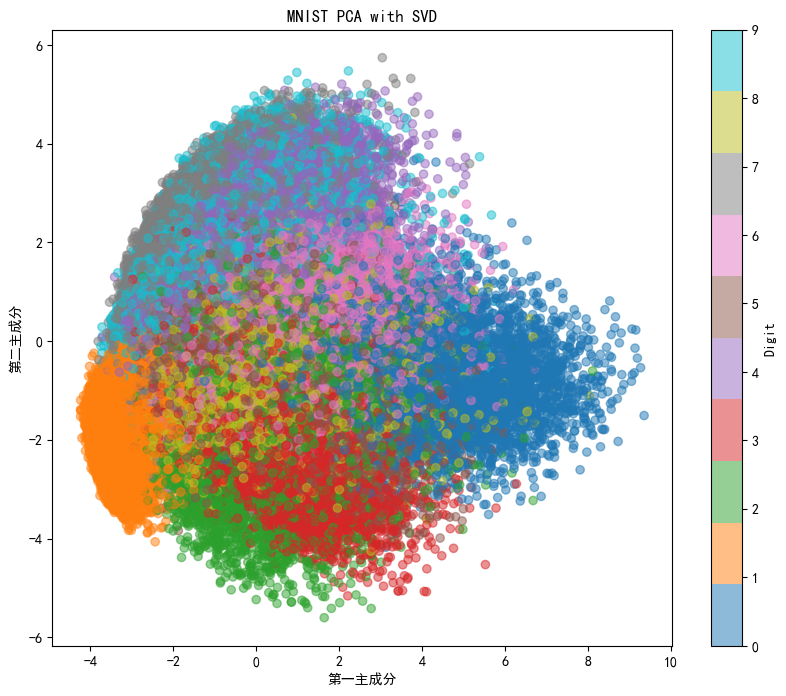

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 加载 MNIST 数据集
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X / 255.0  # 归一化

# 数据中心化
X_centered = X - np.mean(X, axis=0)

# SVD 分解
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 选择前两个主成分
V2 = Vt[:2, :]

# 投影到二维空间
X2D = np.dot(X_centered, V2.T)

# 可视化
plt.figure(figsize=(10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c=y.astype(int), cmap='tab10', alpha=0.5)
plt.colorbar(label='Digit')
plt.title('MNIST PCA with SVD')
plt.xlabel('第一主成分')
plt.ylabel('第二主成分')
plt.show()